In [60]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load dataset and get basic informatiom
df = pd.read_csv('/Users/rujvi/Downloads/IBM HR Attrition Data.csv')
print(df.info())
print(df.head())

#Data Cleaning: Find duplicates, missing value, unique values, and convert attrition column to numerical
print("Duplicates in Dataset: ",df.duplicated().sum())

df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

print(df.isnull().sum())

print("Unique values in Department column:", df['Department'].unique())
print("Unique values in Attrition column:", df['Attrition'].unique())
print("Unique values in JobSatisfaction column:", df['JobSatisfaction'].unique())
print("Unique values in Education column:", df['Education'].unique())

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


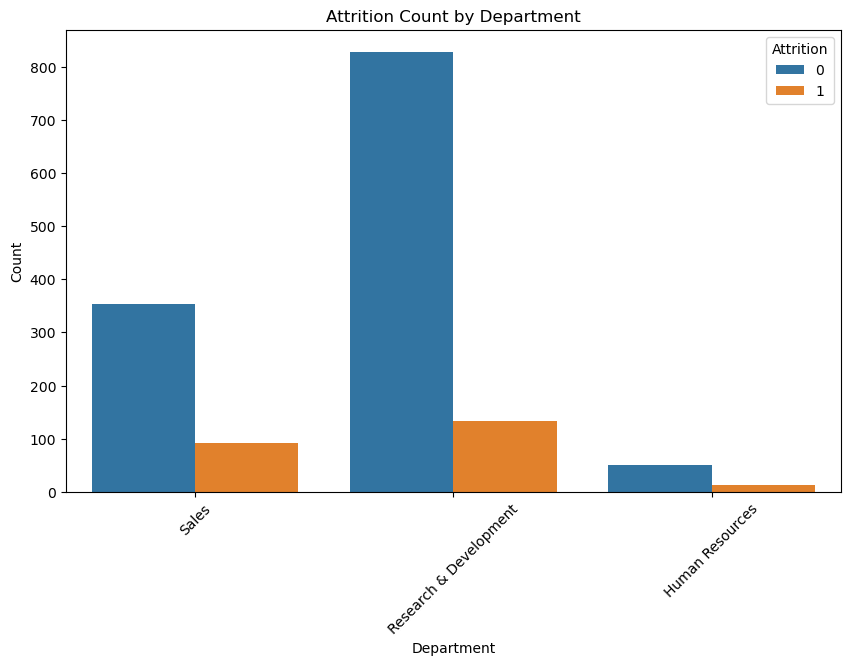

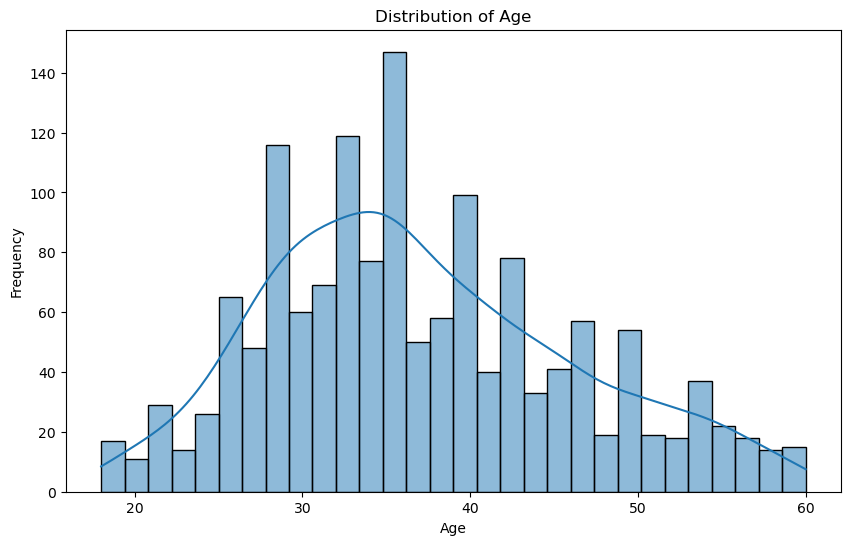

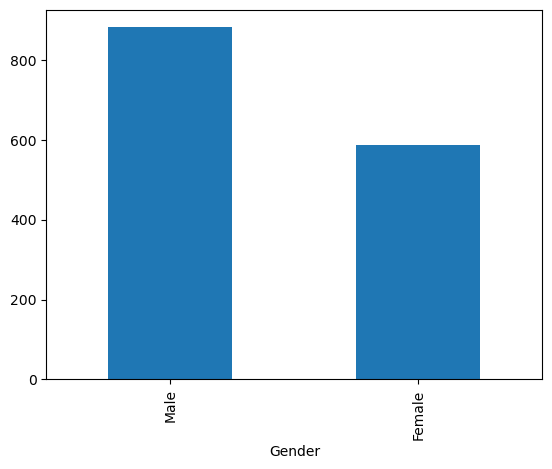

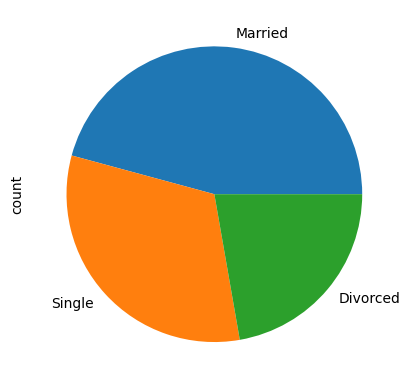

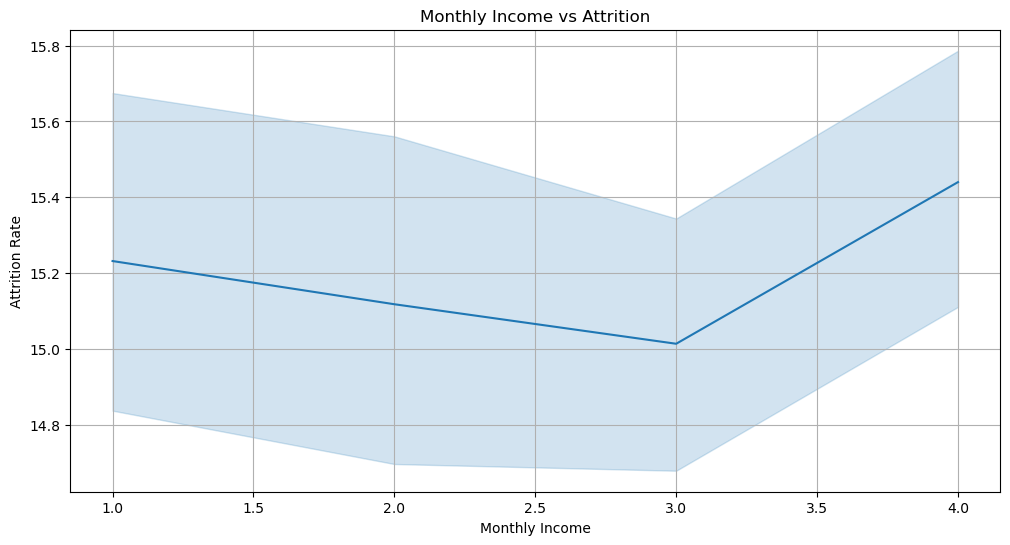

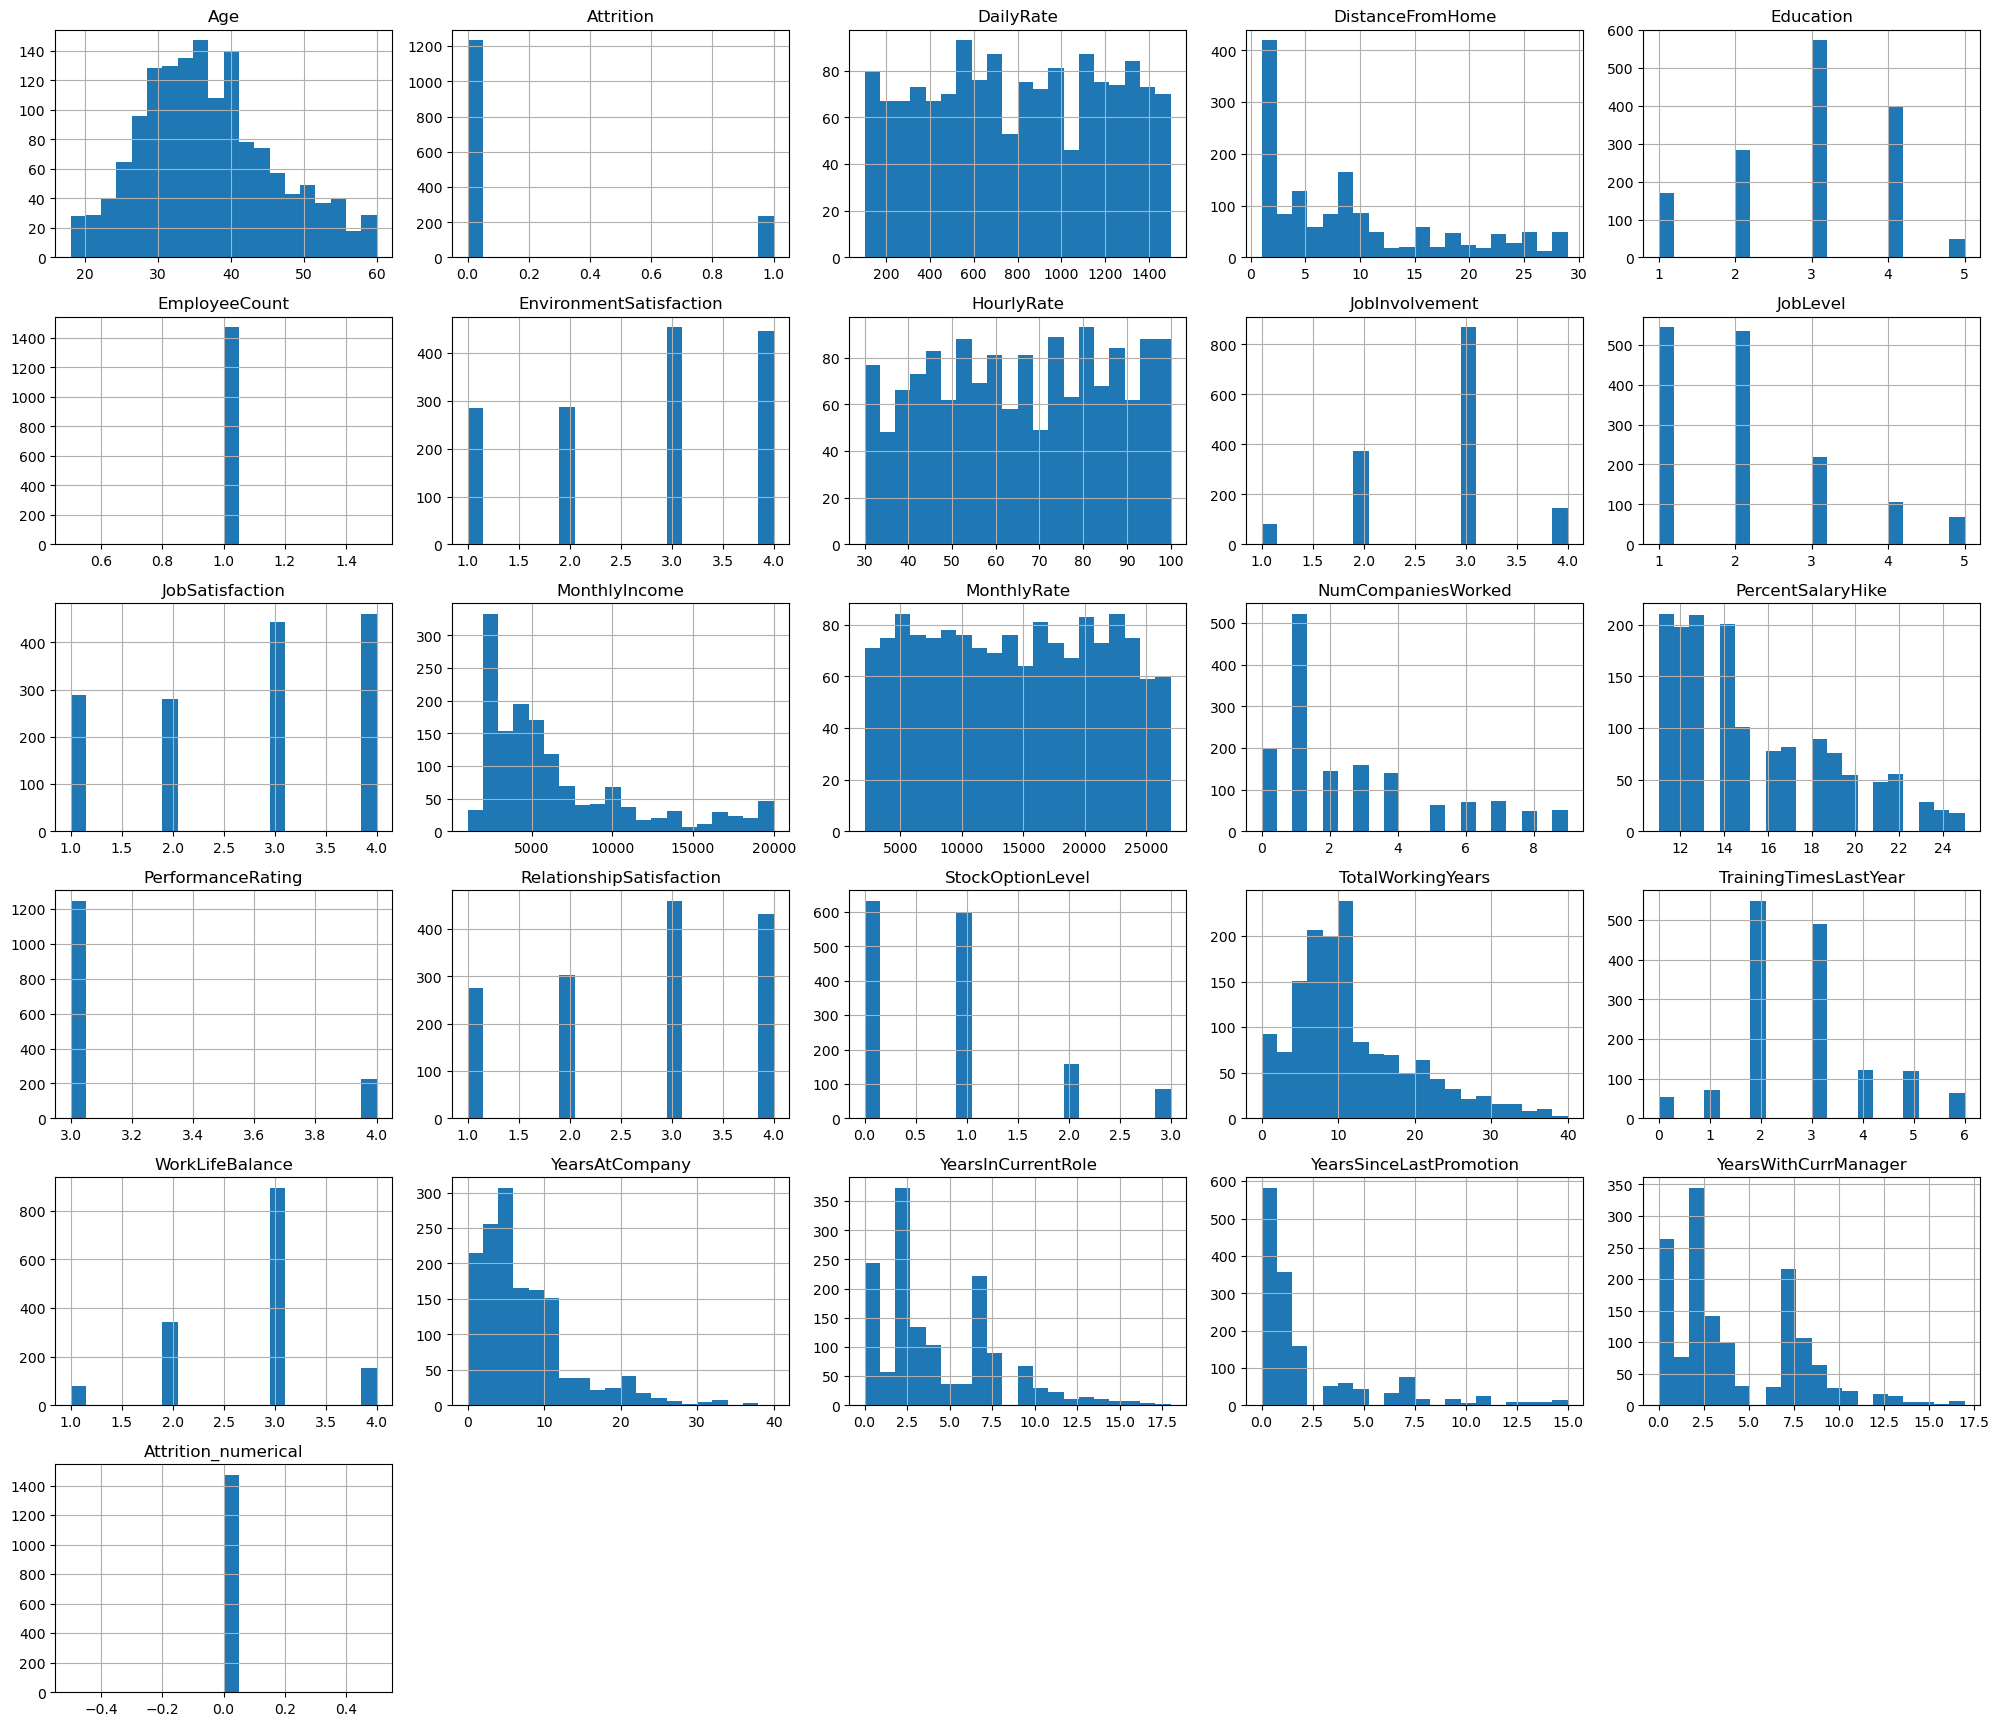

In [70]:
#Plot graphs

# Attrition by department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', data=df, hue='Attrition')
plt.title('Attrition Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.show()


# Histogram for age distrubution 
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Frequency of gender
df['Gender'].value_counts().plot(kind = 'bar')
plt.show()

#Pie chart of marital status by attrition
df['MaritalStatus'].value_counts().plot(kind = 'pie')
plt.show()

#Line graph of monthly income vs attrition
plt.figure(figsize=(12, 6))
sns.lineplot(x='JobSatisfaction', y='PercentSalaryHike', data=df)
plt.title('Monthly Income vs Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()


#Bar graphs of all variables vs attrition
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(20, 20), bins=20, layout=(7, 5))
plt.tight_layout()

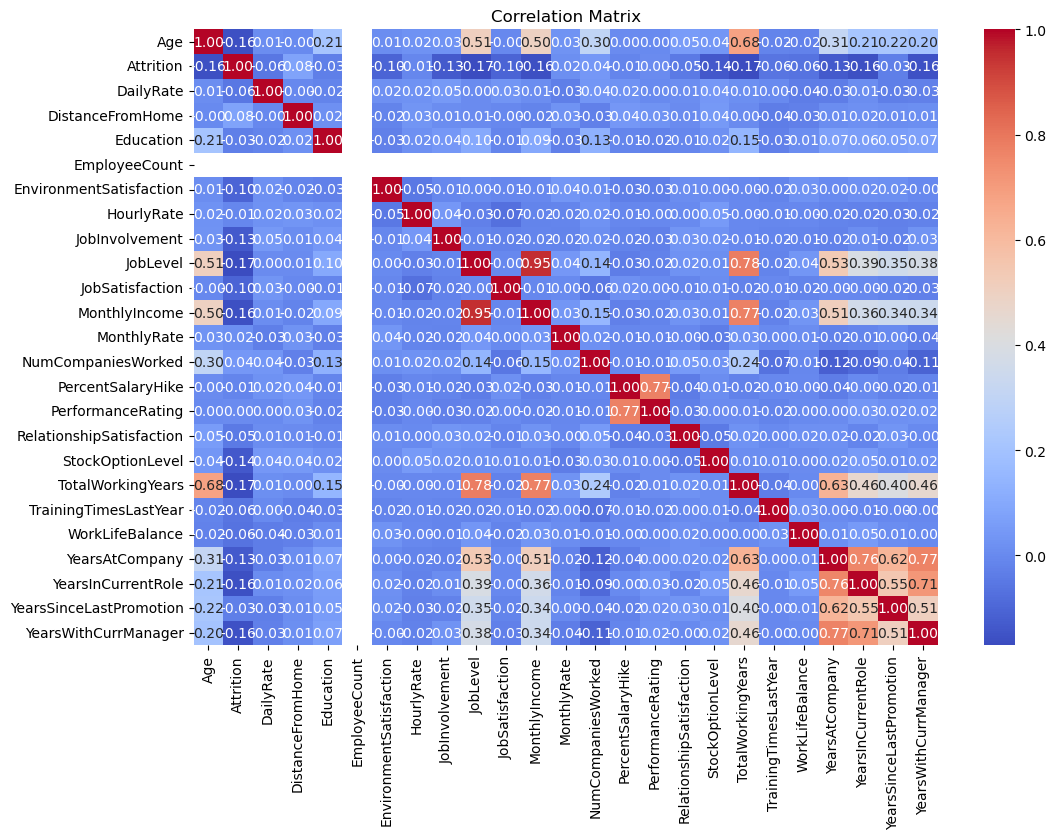

Chi2: 119.17494882869863, p-value: 2.5758529842770143e-09
Chi2: 1319.0239407845436, p-value: 0.7085811366458111
Chi2: 3.0739613982367193, p-value: 0.5455253376565949
Chi2: 0.00015475439428271534, p-value: 0.9900745465934576
Chi2: 1462.6145539474094, p-value: 0.0


In [62]:
#Take in numerical columns and make a correlation matrix usinf heatmap
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


from scipy.stats import chi2_contingency

#Hypothesis test against attrition
contingency_table1 = pd.crosstab(df['Attrition'], df['Age'])
chi2, p, _, _ = chi2_contingency(contingency_table1)
print(f"Chi2: {chi2}, p-value: {p}")

contingency_table2 = pd.crosstab(df['Attrition'], df['MonthlyIncome'])
chi2, p, _, _ = chi2_contingency(contingency_table2)
print(f"Chi2: {chi2}, p-value: {p}")

contingency_table3 = pd.crosstab(df['Attrition'], df['Education'])
chi2, p, _, _ = chi2_contingency(contingency_table3)
print(f"Chi2: {chi2}, p-value: {p}")

contingency_table4 = pd.crosstab(df['Attrition'], df['PerformanceRating'])
chi2, p, _, _ = chi2_contingency(contingency_table4)
print(f"Chi2: {chi2}, p-value: {p}")

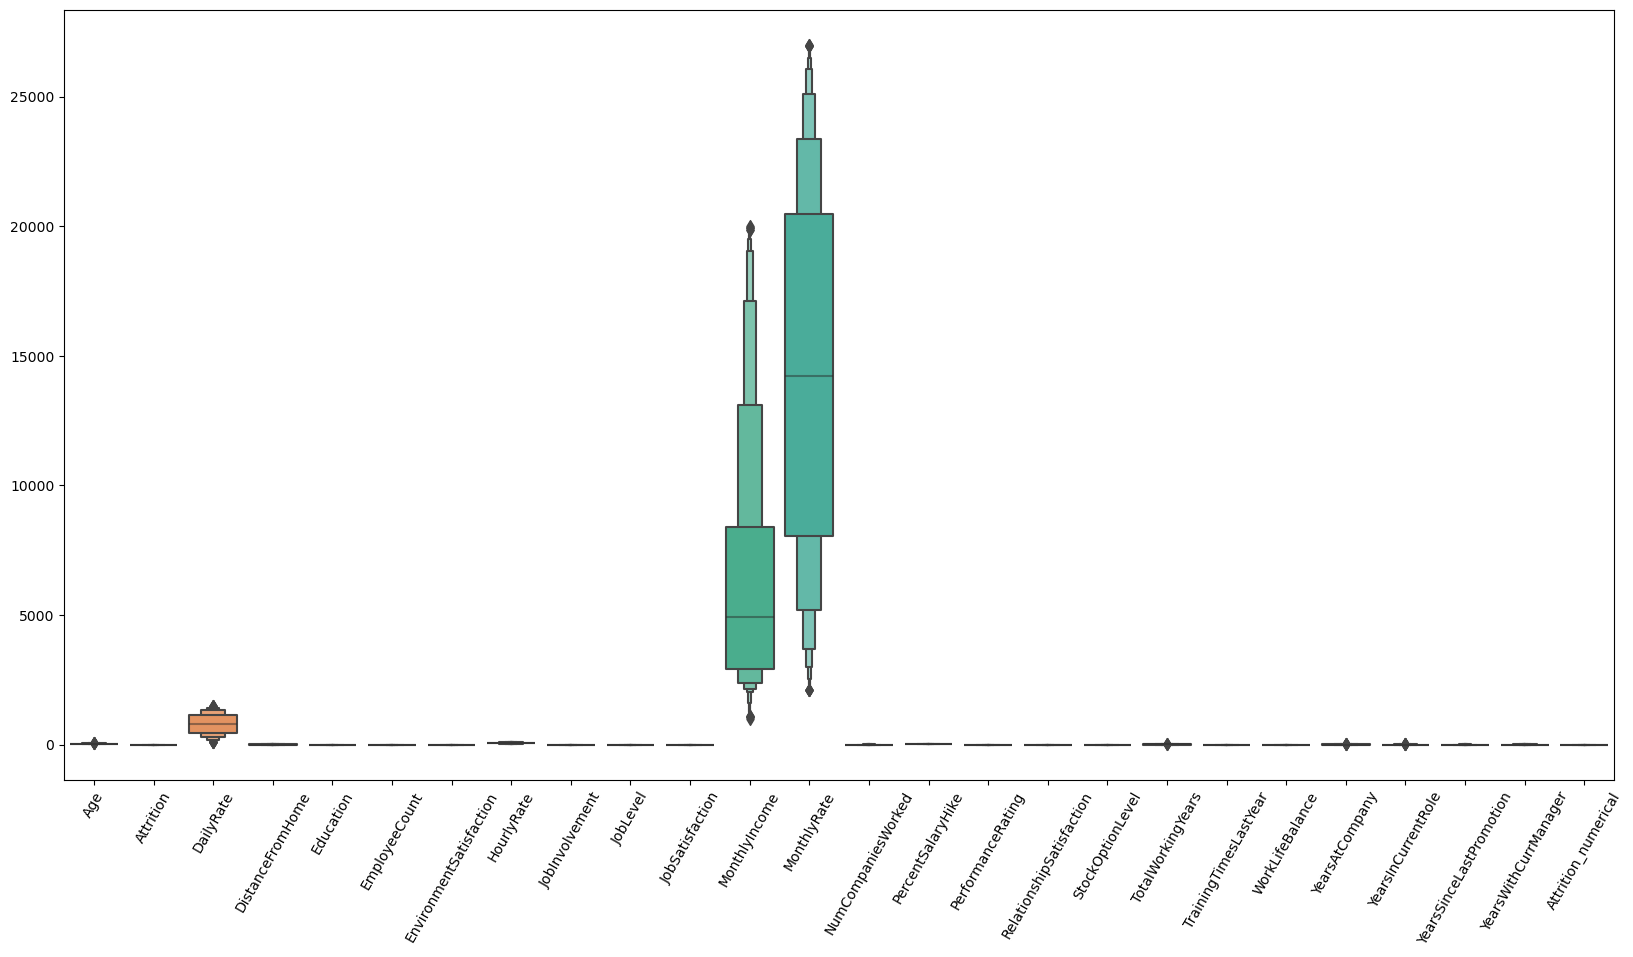

In [69]:
#Shows distribution
plt.figure(figsize=(20,10))
sns.boxenplot(data = df)
plt.xticks(rotation=60)
plt.show()

                   Variables  VIF values
0                        Age    2.054172
1             BusinessTravel    1.016413
2                  DailyRate    1.023990
3                 Department    1.942150
4           DistanceFromHome    1.017135
5                  Education    1.063531
6             EducationField    1.016236
7              EmployeeCount  230.187547
8    EnvironmentSatisfaction    1.017516
9                     Gender    1.019383
10                HourlyRate    1.021142
11            JobInvolvement    1.020804
12                  JobLevel   11.821396
13                   JobRole    1.894260
14           JobSatisfaction    1.020727
15             MaritalStatus    1.840999
16             MonthlyIncome   11.052627
17               MonthlyRate    1.015602
18        NumCompaniesWorked    1.261957
19                  OverTime    1.028587
20         PercentSalaryHike    2.521576
21         PerformanceRating    2.519366
22  RelationshipSatisfaction    1.020852
23          Stoc

/Users/rujvi/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


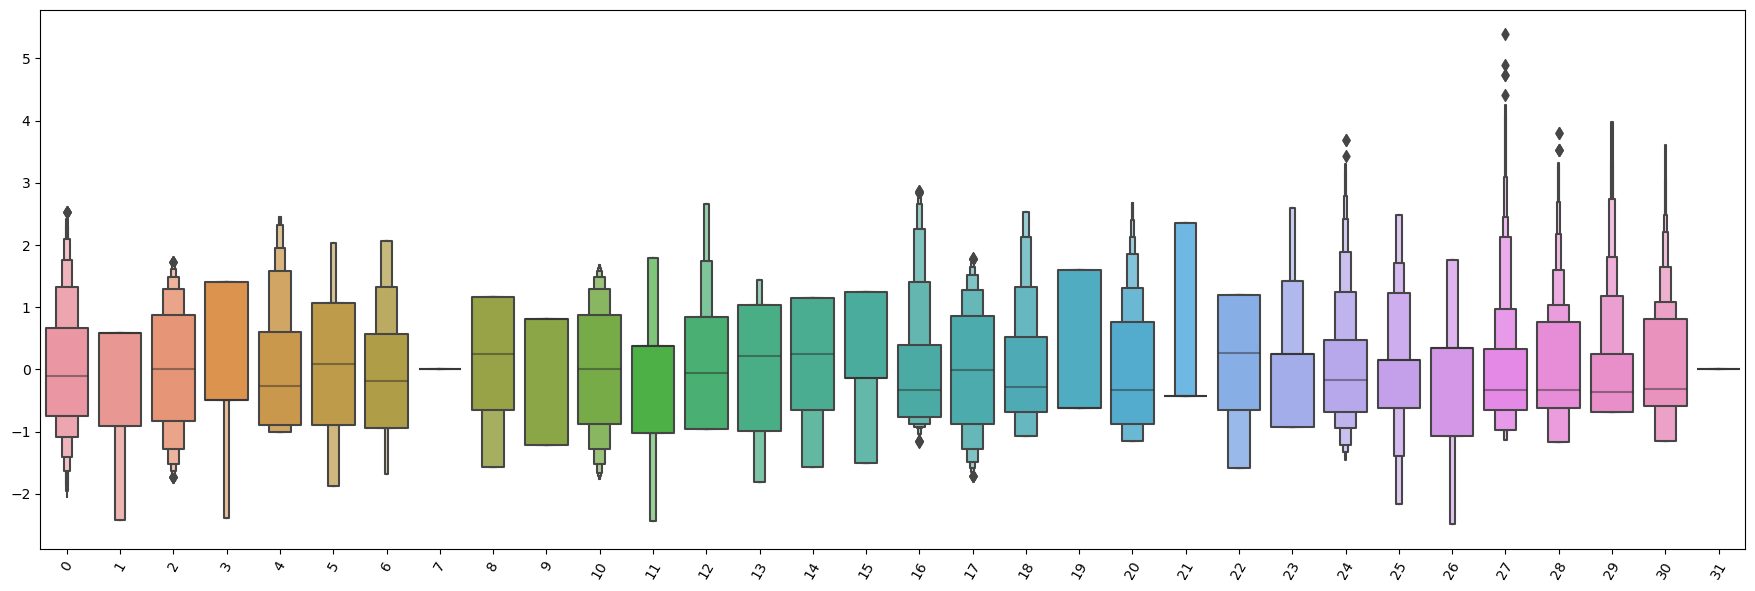

    principComponent  VIF value
0                  1        1.0
1                  2        1.0
2                  3        1.0
3                  4        1.0
4                  5        1.0
5                  6        1.0
6                  7        1.0
7                  8        1.0
8                  9        1.0
9                 10        1.0
10                11        1.0
11                12        1.0
12                13        1.0
13                14        1.0
14                15        1.0
15                16        1.0
16                17        1.0
17                18        1.0
18                19        1.0
19                20        1.0
20                21        1.0
21                22        1.0
22                23        1.0
23                24        1.0
24                25        1.0
25                26        1.0
26                27        1.0
27                28        1.0
28                29        1.0
29                30        1.0
30      

In [67]:


# Get the VIF values for each variable
vifVal = pd.DataFrame()
vifVal["Variables"] = X.columns
vifVal["VIF values"] = [variance_inflation_factor(X.values, i) 
            for i in range(len(X.columns))]
print(vifVal)

# Standardize the features and make boxplot to show distribution
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
plt.figure(figsize=(22, 7))
sns.boxenplot(data = X_scaler)
plt.xticks(rotation=60)
plt.show()

# Performs PCA and gets the VIF values after PCA
applyPca = PCA()
X_PCA = applyPca.fit_transform(X_scaler)
vifValAfterPCA = pd.DataFrame()
eqOne = applyPca.n_components_ + 1
vifValAfterPCA["principComponent"] = range(1, eqOne)
vifValAfterPCA["VIF value"] = [variance_inflation_factor(X_PCA, i) 
    for i in range(applyPca.n_components_)]
print(vifValAfterPCA)

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

Test Accuracy: 0.891156462585034
Train Accuracy: 0.8707482993197279


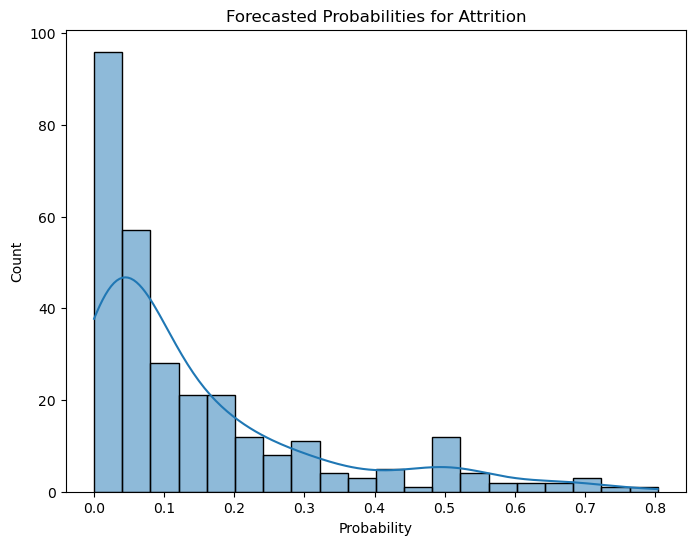

In [68]:
#Logistic Regression
# Gets target and features
y = df['Attrition']
X = df.drop(columns=['Attrition'])
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset and standardize features
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
LRModel = LogisticRegression(max_iter=1000)
LRModel.fit(X_train_scaled, y_train)

# Model predictions and evaluations
y_pred_train = LRModel.predict(X_train_scaled)
y_pred_test = LRModel.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

#Check probability of attrition = yes
y_pred_test_prob = LRModel.predict_proba(X_test_scaled)[:, 1]  

# Graph forecasted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_test_prob, bins=20, kde=True)
plt.title('Forecasted Probabilities for Attrition')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.70      0.18      0.29        39

    accuracy                           0.88       294
   macro avg       0.79      0.58      0.61       294
weighted avg       0.86      0.88      0.85       294

Test Accuracy: 0.8809523809523809
Train Accuracy: 0.8630952380952381


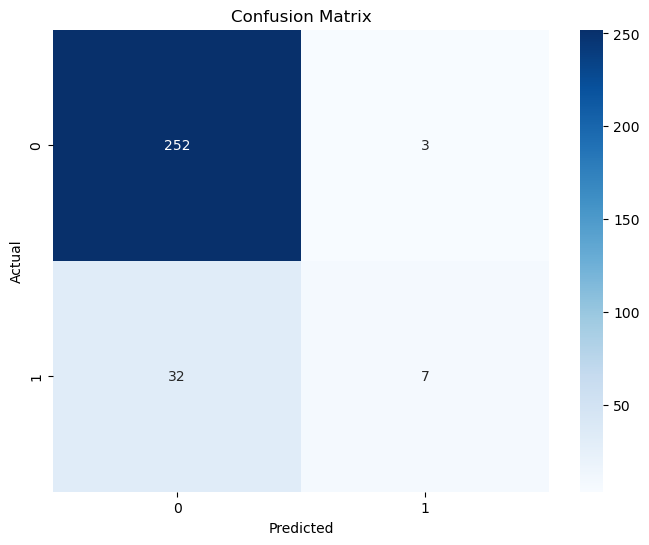

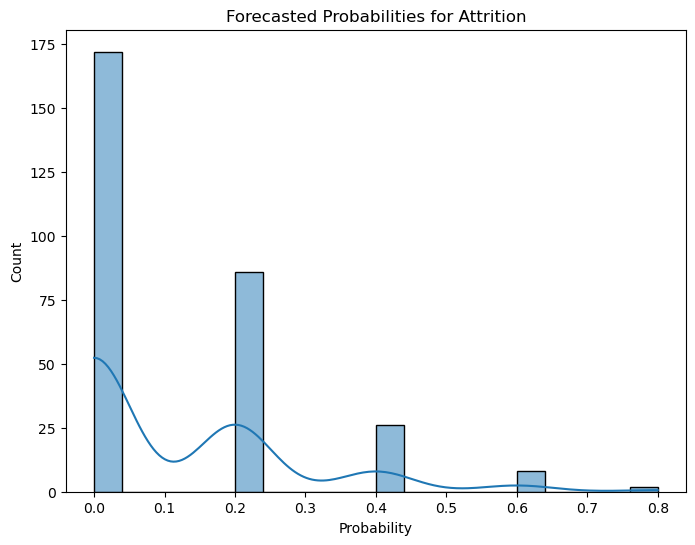

In [58]:

#KNN model
# Extract target and features
y = df['Attrition']
X = df.drop(columns=['Attrition'])
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset and standardize
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train model, predict, and show evaluations
model = KNeighborsClassifier(n_neighbors=5)  
model.fit(X_train_scaled, y_train)
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Check probability of attrition = yes
y_pred_test_prob = model.predict_proba(X_test_scaled)[:, 1] 

# Graph forecasted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_test_prob, bins=20, kde=True)
plt.title('Forecasted Probabilities for Attrition')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
